In [ ]:
'''
Types of Probability Distribution
'''

In [ ]:
'''
1. Bernoulli Distribution
'''


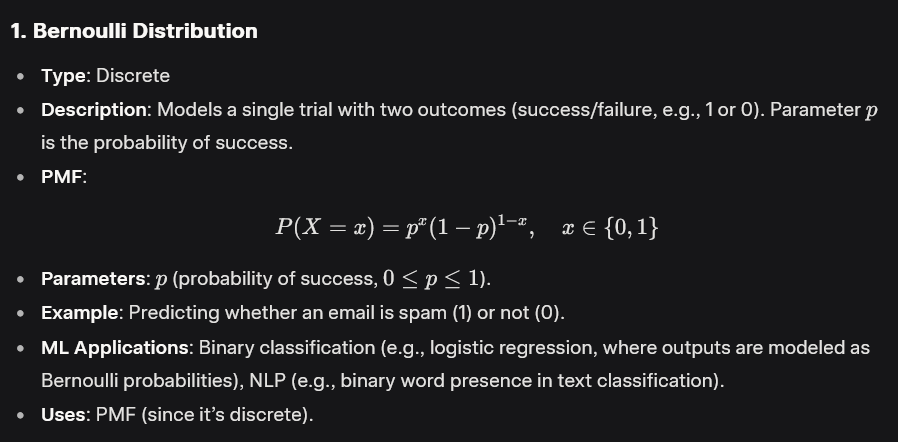